In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)



Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import time
import gc
import sys
import pickle
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import time
import seaborn as sns
import pandas.core.indexes as i
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.wrappers.scikit_learn import KerasClassifier 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.layers import Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import  Conv2DTranspose
from tensorflow.keras.layers import BatchNormalization
import keras
from keras import layers


In [ ]:
copied_path='/content/drive/MyDrive/9z_ML_Bootcamp/Wafer_Defects/1LSWMD.pkl'
data=pd.read_pickle(copied_path)


In [ ]:
data_backup=data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


In [ ]:
# if need restart, restart from here. reading data took too long
resize_img=28
RGB=1


data=data_backup
data=shuffle(data)




In [ ]:
# remove the [] in failure type. easier for onehot encoder
label=data.trianTestLabel.values
label = [ str(obj).replace("[[", "").replace("]]", "") for obj in label ]
label = np.array(label)
len(label)

811457

In [ ]:
data

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
550274,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1513.0,lot34522,25.0,[],[]
609682,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,...",710.0,lot38342,21.0,[],[]
777585,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1414.0,lot46168,2.0,[[Test]],[[none]]
537881,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,...",710.0,lot33580,8.0,[],[]
544403,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1513.0,lot33992,12.0,[],[]
...,...,...,...,...,...,...
418799,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,...",899.0,lot25114,20.0,[],[]
329381,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",12662.0,lot19846,21.0,[],[]
582049,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2,...",846.0,lot36342,3.0,[],[]
98841,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1557.0,lot6886,18.0,[],[]


In [ ]:
failuretype=data.failureType.values
failuretype = [ str(obj).replace("[['", "").replace("']]", "") for obj in failuretype ]
failuretype = np.array(failuretype)
len(failuretype)

811457

In [ ]:
df=pd.DataFrame()
df['label']=label
df['type']=failuretype
df['wafermap']=data.waferMap.values
df['diesize']=data['dieSize'].values
df['lot']=data.lotName.values
df['waferindex']=data.waferIndex
df.drop(df[df['type']=='[]'].index,axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172950 entries, 2 to 811447
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   label       172950 non-null  object 
 1   type        172950 non-null  object 
 2   wafermap    172950 non-null  object 
 3   diesize     172950 non-null  float64
 4   lot         172950 non-null  object 
 5   waferindex  172950 non-null  float64
dtypes: float64(2), object(4)
memory usage: 9.2+ MB


In [ ]:
types=df['type'].unique()
types

array(['none', 'Scratch', 'Loc', 'Center', 'Edge-Loc', 'Edge-Ring',
       'Random', 'Donut', 'Near-full'], dtype=object)

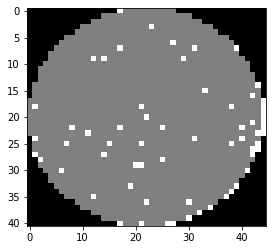

In [ ]:
map_temp=df[df.type=="none"].wafermap.to_numpy()
c=map_temp[324]
c.shape
plt.imshow(c.flatten().reshape(c.shape[0],c.shape[1]), cmap="gray")


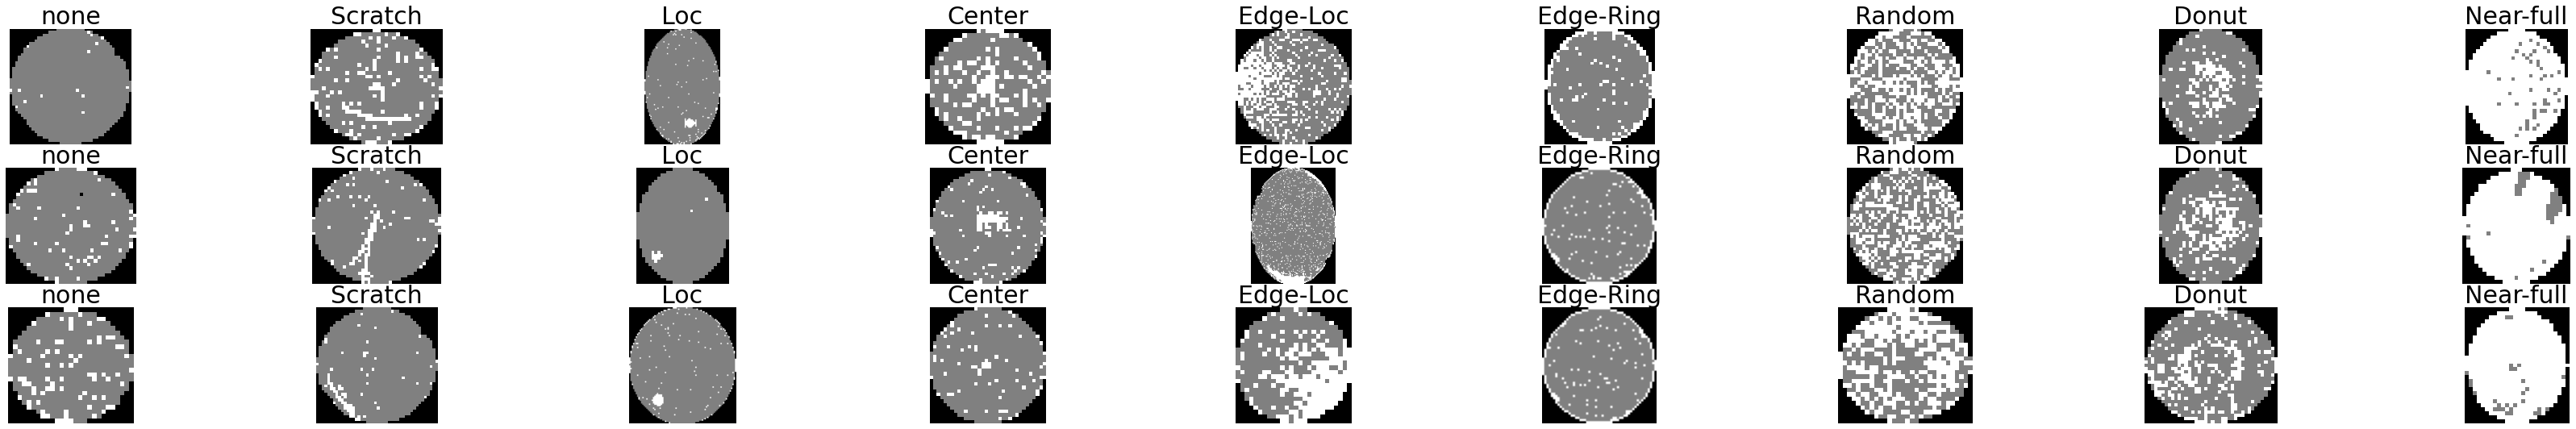

In [ ]:
# example of each defects
rows=3
m=len(types)
fig,ax=plt.subplots(rows, m,figsize=(60,9))
for f,ftype in enumerate(types):
    for i in range(rows):
        plt.subplot(rows,len(types),i*len(types)+f+1) 
        plt.axis('off')
        map_temp=df[df.type==ftype].wafermap.to_numpy()[i]
        plt.figsize=(3,3)
        plt.imshow(map_temp.flatten().reshape(map_temp.shape[0],map_temp.shape[1]), cmap="gray")
        plt.title(ftype,fontsize=30)


Text(0.5, 1.0, 'Countplot of Failure Types')

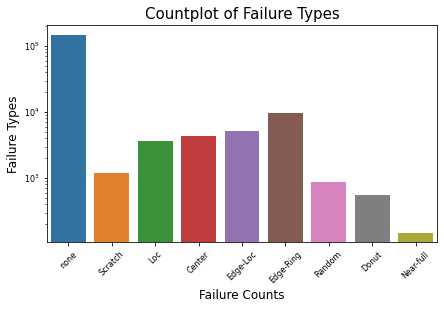

In [ ]:
f, ax = plt.subplots(figsize=(7,4))
ax.set(yscale="log")
sns.countplot(df.type) # need undersample, perfect wafer has too many samples!
plt.xticks(rotation=45,fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Failure Counts', fontsize=12)

plt.ylabel('Failure Types',fontsize=12)
plt.title('Countplot of Failure Types',fontsize=15)


In [ ]:
# downsample 
imgs=df[df.type != 'none']['wafermap']
label=df[df.type != 'none']['type']

len(imgs.to_numpy())
label

16        Edge-Ring
34          Scratch
38         Edge-Loc
132       Edge-Ring
154             Loc
            ...    
811407     Edge-Loc
811412     Edge-Loc
811428    Edge-Ring
811438     Edge-Loc
811451    Edge-Ring
Name: type, Length: 25519, dtype: object

In [ ]:
none_sample=shuffle(df[df.type == 'none'])

none_downsample=df[df.type == 'none'].iloc[1:len(imgs.to_numpy())//3,:]
imgs_none= none_downsample.wafermap
label_none=none_downsample.type
len(imgs_none)

8505

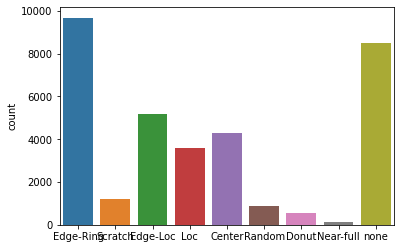

In [ ]:
x=imgs.append(imgs_none).to_numpy()
y=label.append(label_none).to_numpy()
len(y)
sns.countplot(y)

In [ ]:
# downsample, sample too large to fit
batch_fit=pd.DataFrame({'x':x,'y':y})
batch_fit=shuffle(batch_fit)
#batch_fit= batch_fit.iloc[1:20000,:]
x_map=batch_fit['x']
y=batch_fit['y']
batch_fit.shape

(34024, 2)

In [ ]:
batch_fit.y.unique()

array(['Center', 'none', 'Donut', 'Edge-Ring', 'Edge-Loc', 'Random',
       'Loc', 'Scratch', 'Near-full'], dtype=object)

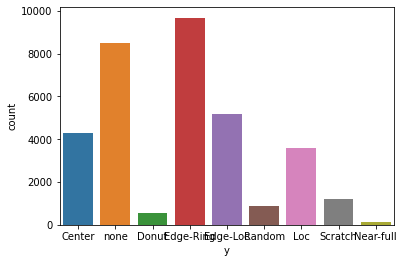

In [ ]:
sns.countplot(batch_fit.y)

In [ ]:
# Start to clean the wafer map data for CNN

In [ ]:
# resize, the dimension of wafer maps are different. 
# need to resize to 1 dimenions. 
x_map=np.array([cv2.resize(img,dsize=(resize_img,resize_img),interpolation=cv2.INTER_CUBIC) for img in x_map])
xmap=x_map/2

In [ ]:
xmap_reshape=xmap.reshape((xmap.shape[0], resize_img,resize_img,1))

In [ ]:
batch_fit.y.unique()


array(['Center', 'none', 'Donut', 'Edge-Ring', 'Edge-Loc', 'Random',
       'Loc', 'Scratch', 'Near-full'], dtype=object)

In [ ]:
y.shape
y_label_backup=y


In [ ]:
def gray_rgb(X_data):
    X=[]

    for i in range(X_data.shape[0]):
        X_temp=X_data[i,:].reshape(resize_img,resize_img,1)
        X_temp_resize= tf.image.resize(X_temp, [resize_img,resize_img])
        X.append(np.concatenate((X_temp_resize,X_temp_resize,X_temp_resize),axis=-1))
    return X

In [ ]:
if RGB==3:
  xmap_reshape=np.asarray(gray_rgb(xmap_reshape))


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(xmap_reshape, y, test_size=0.2, random_state=101)


In [ ]:
label_index=np.where(y_train=='Random')
xmap_reshape[label_index].shape
X_train_center=xmap_reshape[label_index]
X_train_center.shape

(676, 28, 28, 1)

In [ ]:
# start DCGAN  show edge example 
BUFFER_SIZE = X_train_center.shape[0]
BATCH_SIZE = 64
train_dataset = tf.data.Dataset.from_tensor_slices(X_train_center).shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)


In [ ]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28,28, 1)

    return model

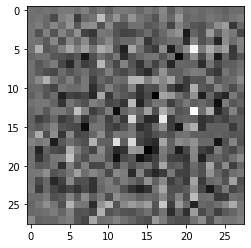

In [ ]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [ ]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28,28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [ ]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[-0.00330544]], shape=(1, 1), dtype=float32)


In [ ]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [ ]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
import os
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [ ]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# We will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])


In [ ]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [ ]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as we go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    #if (epoch + 1) % 15 == 0:
    #checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

In [ ]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4,4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

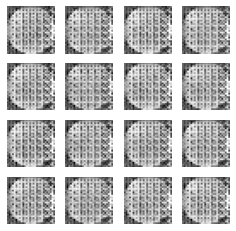

In [ ]:
generator_weight = generator.get_weights()
discriminator_weight = discriminator.get_weights()
train(train_dataset, EPOCHS)



In [ ]:
# Display a single image using the epoch number
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

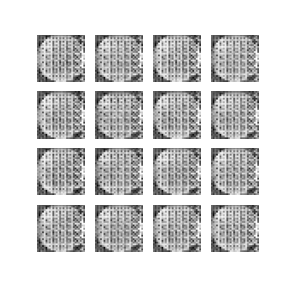

In [ ]:
display_image(EPOCHS)

In [ ]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

In [ ]:
# To generate GIFs
!pip install -q imageio
!pip install -q git+https://github.com/tensorflow/docs

     |████████████████████████████████| 1.0MB 17.0MB/s 



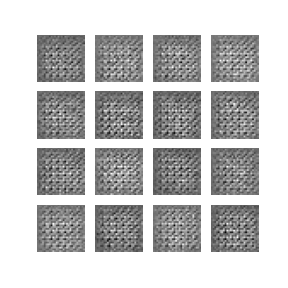

In [ ]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)

In [ ]:
from google.colab import files

files.download("dcgan.gif")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
seed0 = tf.random.normal([1000-X_train_center.shape[0], 100])
predictions = generator(seed0, training=False)

predictions = np.stack(list(predictions))
predictions.shape

(324, 28, 28, 1)

In [ ]:
seed0.shape

TensorShape([324, 100])

In [ ]:
X_train_center.shape[0]

676

In [ ]:
# reset weigth to train other defects
generator.set_weights(generator_weight)
discriminator.set_weights(discriminator_weight)



In [ ]:
print(y_train.unique())
print(len(y_train[y_train=='Donut']))
print(len(y_train[y_train=='Random']))
print(len(y_train[y_train=='Near-full']))

['none' 'Center' 'Edge-Loc' 'Edge-Ring' 'Scratch' 'Loc' 'Near-full'
 'Random' 'Donut']
443
676
124


In [ ]:
label_index=np.where(y_train=='Donut')
print(X_train[label_index].shape)



(443, 28, 28, 1)


In [ ]:
BUFFER_SIZE = len(X_train[label_index])
BATCH_SIZE = 64
train_dataset1 = tf.data.Dataset.from_tensor_slices(X_train[label_index]).shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)
print(BUFFER_SIZE)


443


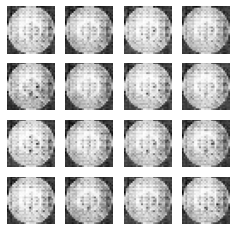

In [ ]:
train(train_dataset1, 150)

In [ ]:
seed1 = tf.random.normal([1000-BUFFER_SIZE, 100])

predictions1 = generator(seed1, training=False)

predictions1 = np.stack(list(predictions1))
predictions1.shape

(557, 28, 28, 1)

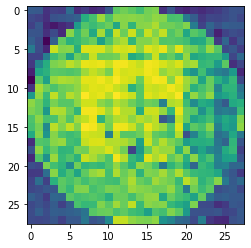

In [ ]:
plt.imshow(predictions1[1].reshape(28,28))

In [ ]:
generator_weight = generator.get_weights()
discriminator_weight = discriminator.get_weights()


In [ ]:
label_index=np.where(y_train=='Near-full')
print(X_train[label_index].shape)


(124, 28, 28, 1)


In [ ]:
BUFFER_SIZE = len(X_train[label_index])
BATCH_SIZE = 32
train_dataset2 = tf.data.Dataset.from_tensor_slices(X_train[label_index]).shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)
print(BUFFER_SIZE)

124


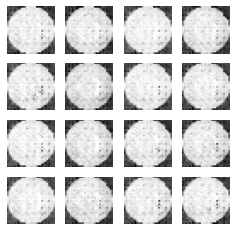

In [ ]:
train(train_dataset2, 80)

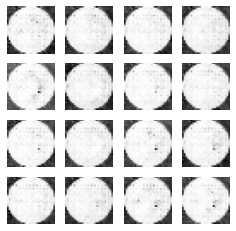

In [ ]:
train(train_dataset2, 80)

In [ ]:
seed2 = tf.random.normal([1000-BUFFER_SIZE, 100])

predictions2 = generator(seed2, training=False)

predictions2 = np.stack(list(predictions2))
predictions2.shape

(876, 28, 28, 1)

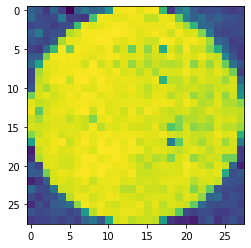

In [ ]:
plt.imshow(predictions2[11].reshape(28,28))

In [ ]:
print(predictions.shape)
print(predictions1.shape)
print(predictions2.shape)


(324, 28, 28, 1)
(557, 28, 28, 1)
(876, 28, 28, 1)


In [ ]:
print(y_train.unique())
y_train_gene_random=['Random' for i in range(predictions.shape[0])]
y_train_gene_donut=['Donut' for i in range(predictions1.shape[0])]
y_train_gene_full=['Near-full' for i in range(predictions2.shape[0])]




['none' 'Center' 'Edge-Loc' 'Edge-Ring' 'Scratch' 'Loc' 'Near-full'
 'Random' 'Donut']


In [ ]:
y_train_gene=[]
y_train_gene=y_train_gene_random+y_train_gene_donut+y_train_gene_full

In [ ]:
X_train_gene=np.append(X_train, predictions, axis=0)
X_train_gene=np.append(X_train_gene, predictions1, axis=0)
X_train_gene=np.append(X_train_gene, predictions2, axis=0)
y_train_gene=np.append(y_train, y_train_gene,  axis=0)


In [ ]:
print(X_train_gene.shape)
print(y_train_gene.shape)

(28976, 28, 28, 1)
(28976,)


In [ ]:
#down sample
train_gene=pd.DataFrame({'y':y_train_gene})
train_gene=train_gene.assign(x=[*X_train_gene])

In [ ]:
train_gene=shuffle(train_gene)
train_gene_final=train_gene.iloc[1:2,]

for failure in y_train.unique():
    temp=train_gene[train_gene.y==failure].iloc[1:999,]
    train_gene_final=train_gene_final.append(temp, ignore_index=True)
    print(failure)


none
Center
Edge-Loc
Edge-Ring
Scratch
Loc
Near-full
Random
Donut


(8923,)
(8923,)


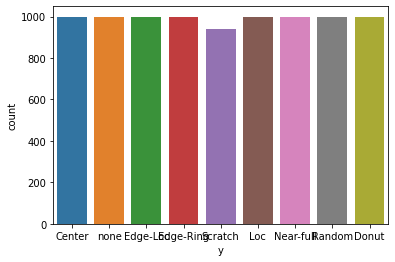

In [ ]:
sns.countplot(train_gene_final.y)
print(train_gene_final.y.shape)
print(train_gene_final.x.shape)

In [ ]:
x=train_gene_final.x
y=train_gene_final.y
x1=train_gene_final.x.to_list()
x2=np.asarray(x1)
x=x2

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.2, random_state=101)
print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(7138, 28, 28, 1)
(1785, 28, 28, 1)
(7138, 9)
(1785, 9)


In [ ]:
# one hot failure labels

n_classes=batch_fit.y.unique()
n_classes=np.sort(n_classes)
for i, j in enumerate(n_classes):
  y[y==j]=i
  y_test[y_test==j]=i

y=to_categorical(y)
y_test=to_categorical(y_test)
y_train2=to_categorical(y_train2)
y_test2=to_categorical(y_test2)



In [ ]:
print(y.shape)
print(y_test.shape)
print(y_train2.shape)
print(y_test2.shape)

(8923, 9)
(6805, 9)
(7138, 9)
(1785, 9)


In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (2,2), padding='same', activation='relu', input_shape = (int(resize_img),int(resize_img),1)))
model.add(Conv2D(32, kernel_size = (2,2), padding='same', activation='relu'))
model.add(BatchNormalization(momentum=0.1))
model.add(MaxPooling2D(3,3))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size = (3,3), padding='same', activation='relu'))
model.add(BatchNormalization(momentum=0.1)) # p 归一化处理，加快训练速度，overfiting，拟合中，先研数据默认高斯分布，拟合时偏离均值，偏离高斯
model.add(MaxPooling2D(3,3))
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size = (5,5), padding='same', activation='relu'))
model.add(Conv2D(32, kernel_size = (5,5), padding='same', activation='relu'))
model.add(BatchNormalization(momentum=0.1))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))


model.add(Dense(9, activation='softmax'))

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
learning_rate_reduction=ReduceLROnPlateau(monitor= 'loss', patience=3, # loss stop drop and change LR after 3 rounds
                                          verbose=1, # call back factor
                                          factor =0.5, # LR x factor
                                          min_lr=0.0001)

In [ ]:
optimizer=Adam(learning_rate=0.001, beta_1=0.9,beta_2= 0.999)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:

#CNN2=model.fit(x=x, y= y,epochs=50,batch_size=256, verbose=2 , validation_data=(X_test,y_test), callbacks=[learning_rate_reduction])
CNN2=model.fit(x=X_train2, y= y_train2,epochs=50,batch_size=32, verbose=2 , validation_data=(X_test2,y_test2), callbacks=[learning_rate_reduction])


Epoch 1/50
224/224 - 1s - loss: 0.2379 - accuracy: 0.9173 - val_loss: 0.8835 - val_accuracy: 0.7983
Epoch 2/50
224/224 - 1s - loss: 0.2427 - accuracy: 0.9151 - val_loss: 1.7498 - val_accuracy: 0.7630
Epoch 3/50
224/224 - 1s - loss: 0.2730 - accuracy: 0.9039 - val_loss: 0.8526 - val_accuracy: 0.8118
Epoch 4/50
224/224 - 1s - loss: 0.2287 - accuracy: 0.9246 - val_loss: 1.0672 - val_accuracy: 0.7782
Epoch 5/50
224/224 - 1s - loss: 0.1945 - accuracy: 0.9311 - val_loss: 1.1559 - val_accuracy: 0.7894
Epoch 6/50
224/224 - 1s - loss: 0.1848 - accuracy: 0.9396 - val_loss: 4.5917 - val_accuracy: 0.6768
Epoch 7/50
224/224 - 1s - loss: 0.2083 - accuracy: 0.9276 - val_loss: 1.7376 - val_accuracy: 0.7686
Epoch 8/50
224/224 - 1s - loss: 0.2025 - accuracy: 0.9309 - val_loss: 0.9556 - val_accuracy: 0.8162
Epoch 9/50
224/224 - 1s - loss: 0.1629 - accuracy: 0.9409 - val_loss: 1.1916 - val_accuracy: 0.7989
Epoch 10/50
224/224 - 1s - loss: 0.1785 - accuracy: 0.9395 - val_loss: 1.6576 - val_accuracy: 0.7815

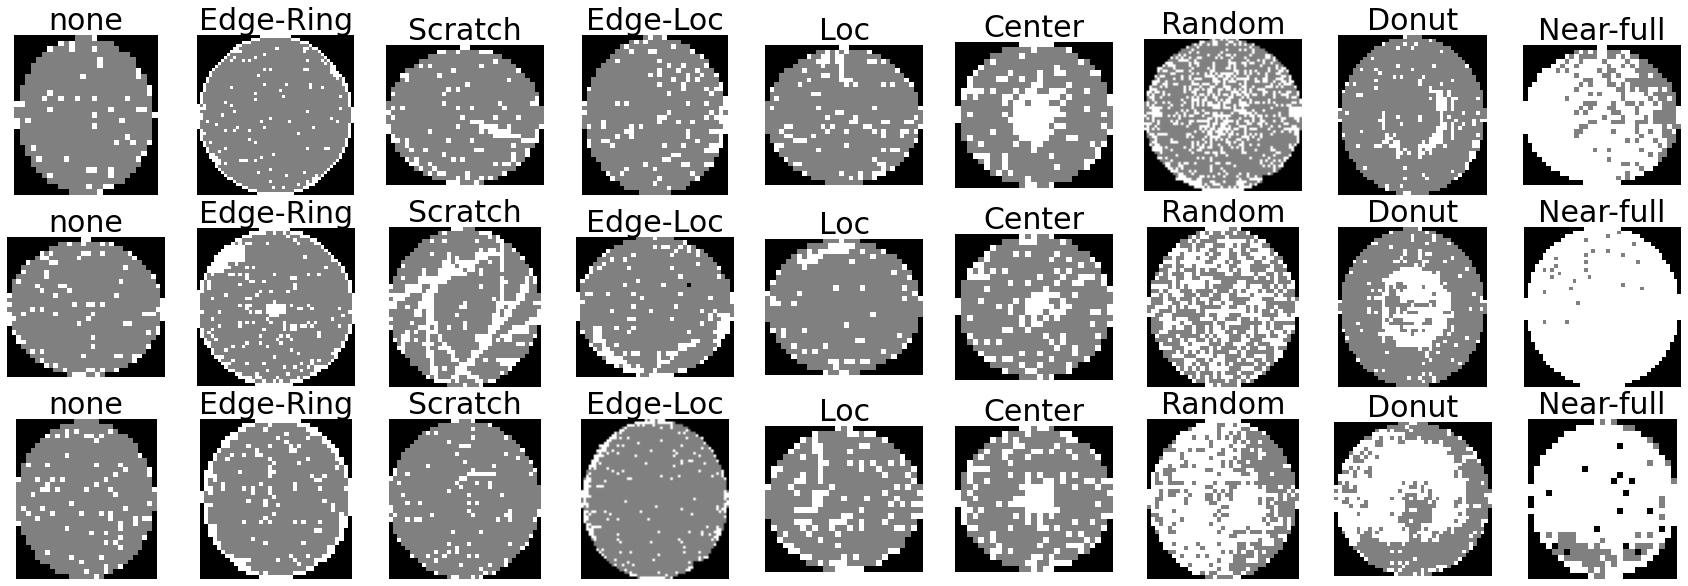

In [ ]:
# example of each defects
rows=3
m=len(types)
fig,ax=plt.subplots(rows, m,figsize=(30,10))
for f,ftype in enumerate(types):
    for i in range(rows):
        plt.subplot(rows,len(types),i*len(types)+f+1) 
        plt.axis('off')
        map_temp=df[df.type==ftype].wafermap.to_numpy()[i]
        plt.figsize=(3,3)
        plt.imshow(map_temp.flatten().reshape(map_temp.shape[0],map_temp.shape[1]), cmap="gray")
        plt.title(ftype,fontsize=30)


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

NameError: ignored

Text(1, 0.994, "('best accuracy', 0.9960871934890747)")

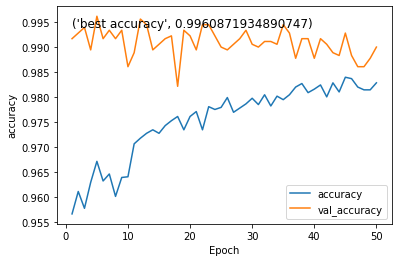

In [ ]:
accuracy  = CNN2.history['accuracy']
val_accuracy = CNN2.history['val_accuracy']

val_loss=CNN2.history['val_loss']
loss=CNN2.history['loss']

train_epoch=range(1,51)
plt.plot(train_epoch,accuracy , label='accuracy')
plt.plot(train_epoch,val_accuracy , label='val_accuracy')

plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()

text=('best accuracy' ,max(val_accuracy),)

plt.text(1,0.9940,text,fontsize =12)


In [ ]:
df=pd.DataFrame()
df['epoch']=train_epoch
df['val_acc']=val_accuracy
df['test_acc']=accuracy
df['val_loss']=val_loss
df['test_loss']=loss
df.to_csv('Alexnet1.csv') 

from google.colab import files
files.download("Alexnet1.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
y_test_pred=np.round(model.predict(X_test2),0)
y_test_pred.shape

y_predict_classes = [np.argmax(y, axis=None, out=None) for y in y_test_pred]
y_test_class= [np.argmax(y, axis=None, out=None) for y in y_test2]
len(y_test_class)

1789

In [ ]:
np.sort(n_classes)

array(['Center', 'Donut', 'Edge-Loc', 'Edge-Ring', 'Loc', 'Near-full',
       'Random', 'Scratch', 'none'], dtype=object)

In [ ]:
from sklearn import metrics

classification_metrics=metrics.classification_report(y_predict_classes,y_test_class, target_names=n_classes)
print(classification_metrics)

              precision    recall  f1-score   support

      Center       1.00      0.98      0.99       205
       Donut       0.99      1.00      1.00       181
    Edge-Loc       0.99      0.99      0.99       196
   Edge-Ring       1.00      1.00      1.00       212
         Loc       0.94      0.99      0.96       175
   Near-full       1.00      1.00      1.00       208
      Random       1.00      1.00      1.00       196
     Scratch       0.99      0.95      0.97       219
        none       0.98      1.00      0.99       197

    accuracy                           0.99      1789
   macro avg       0.99      0.99      0.99      1789
weighted avg       0.99      0.99      0.99      1789



In [ ]:
y_predict_classes=pd.DataFrame(y_predict_classes)
y_test_class=pd.DataFrame(y_test_class)

for i, j in enumerate(n_classes):

  y_predict_classes[y_predict_classes==i]=n_classes[i]
  y_test_class[y_test_class==i]=n_classes[i]
y_predict_classes=y_predict_classes.to_numpy()
y_test_class=y_test_class.to_numpy()
y_predict_classes

array([['Near-full'],
       ['Center'],
       ['Center'],
       ...,
       ['Random'],
       ['Edge-Ring'],
       ['Scratch']], dtype=object)

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')    

Normalized confusion matrix


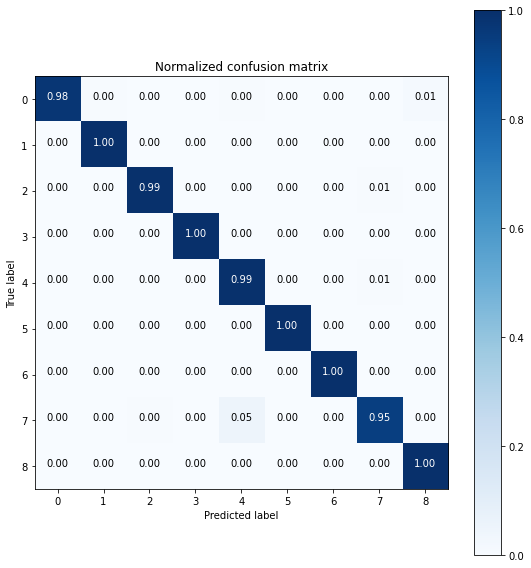

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


cnf_matrix = confusion_matrix(y_predict_classes, y_test_class)
np.set_printoptions(precision=2)

from matplotlib import gridspec
fig = plt.figure(figsize=(15, 8)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1]) 



# Plot normalized confusion matrix
plt.subplot(gs[1])
plot_confusion_matrix(cnf_matrix,   title='Normalized confusion matrix', normalize=True )


plt.show()

In [ ]:
n_classes

array(['Center', 'Donut', 'Edge-Loc', 'Edge-Ring', 'Loc', 'Near-full',
       'Random', 'Scratch', 'none'], dtype=object)

In [ ]:
y_predict_classes

array([['Edge-Ring'],
       ['none'],
       ['Edge-Loc'],
       ...,
       ['none'],
       ['Edge-Ring'],
       ['Edge-Ring']], dtype=object)

In [ ]:
y_predict_classes


In [ ]:
n_classes[1]

In [ ]:
y_predict_classes